<b><i><h1 style='background-color: rgba(0, 100, 200, .1) ; text-align:center ; padding-top:5px ; padding-bottom:5px'>
    Predicting Python/HTML of Github NLP Repositories
</h1></i></b>

## Overview

Utilizing Web-Scraping techniques on Github NLP repository's README that have the majority of the code as Python or HTML, create a classification model that accurately predicts the predominant coding language used within each repository.  This is important to see if there is any pattern of vocabulary usage that tends to dictate the predominant coding language.

---

<b><i><h1 style='background-color: rgba(0, 100, 200, .1) ; text-align:center ; padding-top:5px ; padding-bottom:5px'>
    Imports
</h1></i></b>

| Python Library | Version | Usage |
| ----- | ----- | ----- |
| numpy | 1.21.5 | Vectorization |
| pandas | 1.4.4 | Dataframing |
| matplotlib | 3.5.2 | Visualization |
| seaborn | 0.11.2 | Visualization |
| wordcloud | 1.9.1.1 | Visualization |
| bs4 | 4.11.1 | NLP |
| requests | 2.28.1 | NLP |
| regex | 2022.7.9 | NLP |
| nltk | 3.7 | NLP |
| unicodedata | X | NLP |
| sklearn | 1.0.2 | Stats, Metrics, Modeling |

In [1]:
# Import to maintain cleanliness of file
import final as f
import modeling as m
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

<b><i><h1 style='background-color: rgba(0, 100, 200, .1) ; text-align:center ; padding-top:5px ; padding-bottom:5px'>
    Acquire
</h1></i></b>

Requirements from grading rubric (WRANGLE):
- Called wrangle functions
- Markdown explaining preparation and why 
- Explain handling missing values
- Split into train, validate, test

<b>Data Description:</b>
- Web-scraped data from 500 NLP related Github repositories that contain the README contents and predominant code language (Python or HTML) for each repository.  The target variable is the predominant coding language of each repository (Python or HTML).

---

<b>Data Dictionary:</b>

| Feature Name | Data Type | Description | Example |
| ----- | ----- | ----- | ----- |
| repo_names | object | Name of Repository | 'huggingface/transformers' |
| contents | object | Contents of Repository's README file | 'Transformers provides thousands of pretrained...' |
| language | object | Predominant coding language of Repository | 'Python' |

---

In [2]:
# Using the final.py file...
# Get the shape of the vanilla dataframe
f.vanilla()

(500, 5)

<b>Vanilla Data Shape:</b>

- Columns: 5
- Rows: 500

<b><i><h1 style='background-color: rgba(0, 100, 200, .1) ; text-align:center ; padding-top:5px ; padding-bottom:5px'>
    Prepare
</h1></i></b>

Requirements from grading rubric (WRANGLE):
- Called wrangle functions
- Markdown explaining preparation and why 
- Explain handling missing values
- Split into train, validate, test

<b>Missing Value Handling:</b>

Nothing of significance.

---

<b>NLP Methodology</b>

1. Clean text of contents
2. Tokenize cleaned text
3. Lemmatize tokenized data
4. Remove stop-words (To include predominant coding language) of lemmatized data

---

<b>Post-Explore Preparation</b>

1. Removed 1 outlier repository
2. Changed all srchttps strings to srchttp_link
3. Removed all '&#9;'

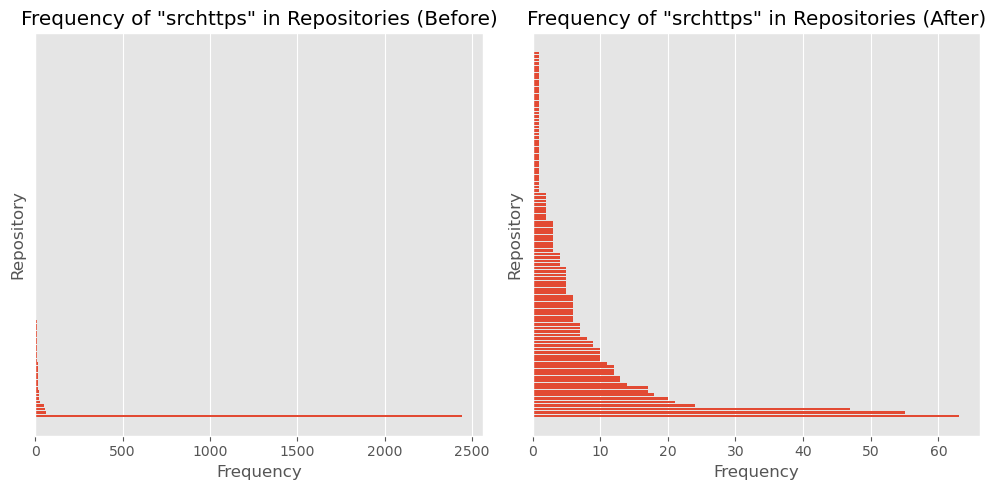

In [3]:
# Using the final.py file...
# Show the visual of the distribution of 'srchttps' before and after for all repositories
f.visual1()

In [4]:
# Using the final.py file...
# Get the shape of the prepared dataframe
prepped_df = f.prepare()
prepped_df.shape

(499, 4)

<b>Prepared Data Shape:</b>

- Columns: 4
- Rows: 499

<b><i><h1 style='background-color: rgba(0, 100, 200, .1) ; text-align:center ; padding-top:5px ; padding-bottom:5px'>
    Explore
</h1></i></b>

Requirements from grading rubric:
- 4 Questions w/ clear answer
- 5 visuals (If statistics shown, must relate to visual)
- 1 accurate statistical test
- Summary (Takeaways, features for modeling w/ explanation)

---

<b>Question 1:</b> Is there unique terminology used for Python and HTML?

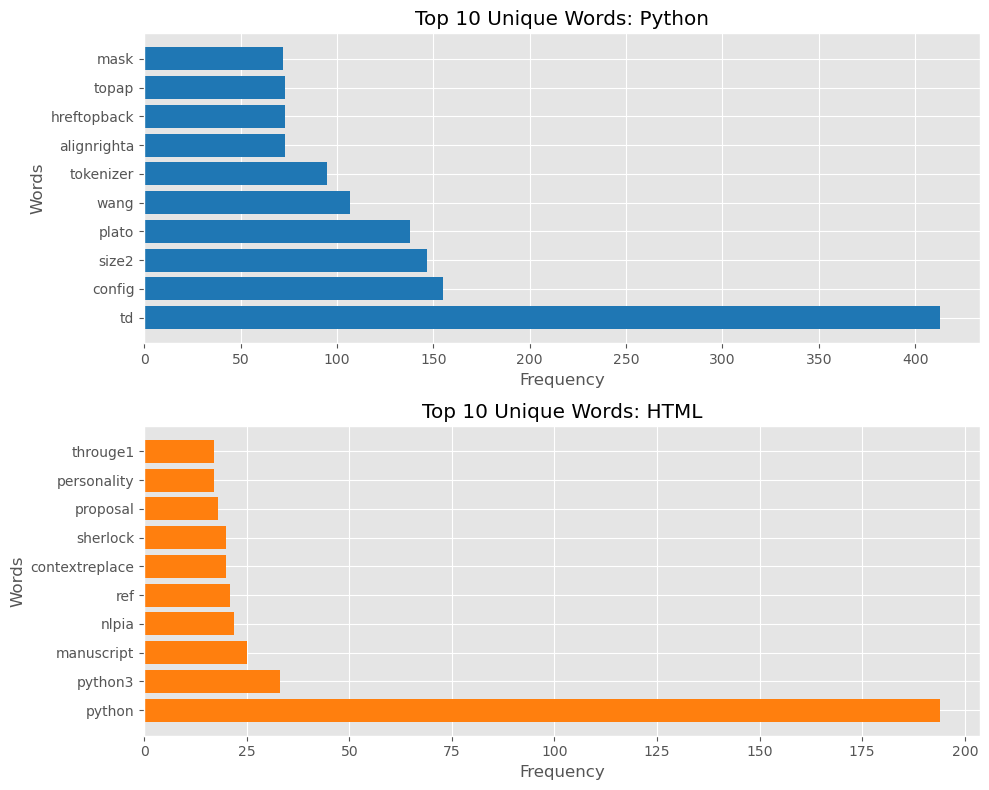

In [5]:
# Using the final.py file...
# Get the distribution of unique words for both Python and HTML repositories
f.visual2()

<b>Answer to Question 1:</b> STUFF

<b>Takeaway:</b> STUFF

---

<b>Question 2:</b> Are there words that are used more in Python than HTML and vice versa?

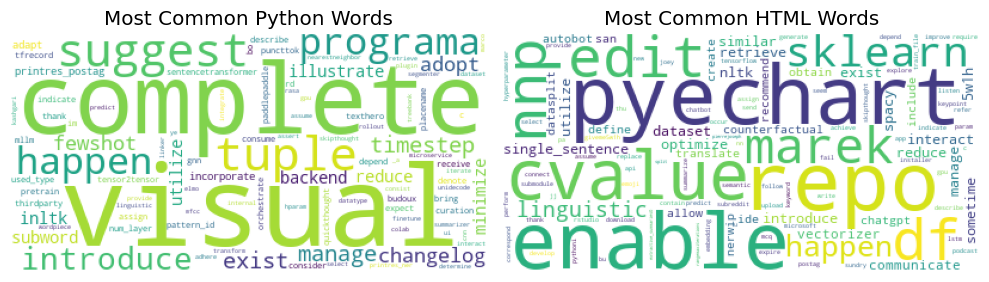

In [6]:
# Using the final.py file...
# Show the most commonly used words across repositories
# via wordclouds of both Python and HTML repositories
f.visual3()

<b>Answer to Question 2:</b> STUFF

<b>Takeaway:</b> STUFF

---

<b>Question 3:</b> Are there 2-word combinations that are used more in Python than HTML and vice versa?

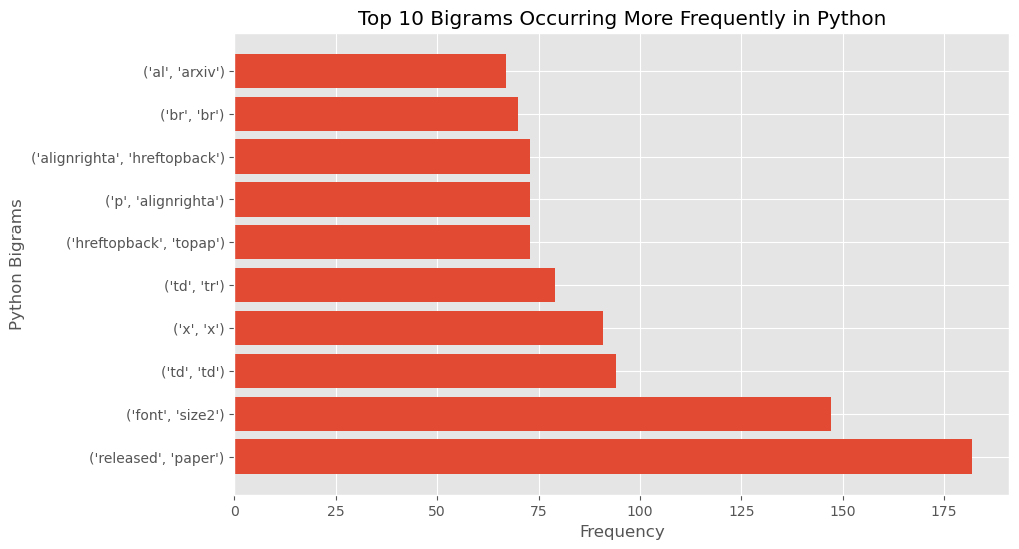

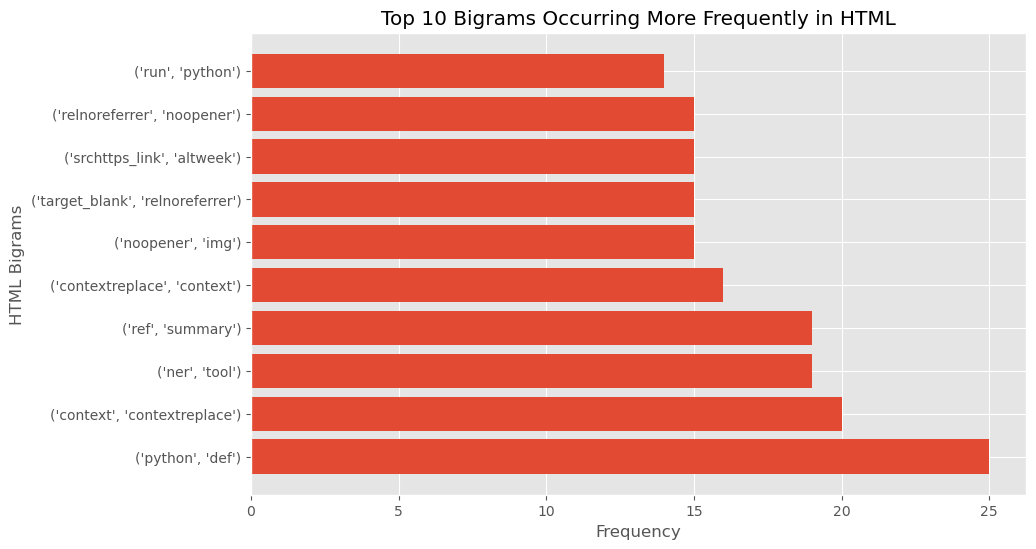

In [7]:
# Using the final.py file...
# Get the distribution of bigrams for both Python and HTML
f.visual4()

<b>Answer to Question 3:</b> STUFF

<b>Takeaway:</b> STUFF

---

<b>Question 4:</b> Does http occur more in Python or in HTML?

<b>IF STAT TESTING, OTHERWISE DELETE THIS</b>

<b>H$_0$:</b> HTTP words occur equally across both Python and HTML repositories.

<b>H$_a$:</b> HTTP words <b>DO NOT</b> occur equally across both Python and HTML repositories.

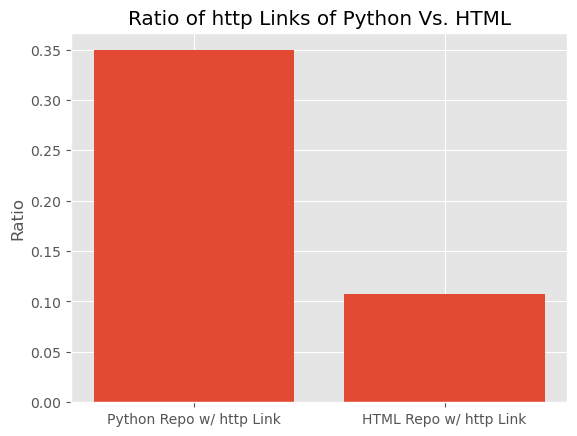

In [8]:
# Using the final.py file...
# Show the distribution of repositories with http words for each language
f.visual5()

In [9]:
# Using the final.py file...
# Get the chi2_contingency stat test of http words vs. language
f.stat1()

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00000064


<b>IF STAT TESTING, OTHERWISE DELETE THIS</b>

Accept <mark><b>Alternate Hypothesis</b></mark>

<b>Answer to Question 4:</b> http words occur more in Python repositories than HTML repositories.

<b>Takeaway:</b> Repositories written in predominantly Python tend to also have http words almost 25% more than that repositories written in HTML.

---

## Exploration Summary

<b>Takeaway:</b> STUFF

<b>Features For Modeling:</b> FEATURE W/ EXPLANATION

<b><i><h1 style='background-color: rgba(0, 100, 200, .1) ; text-align:center ; padding-top:5px ; padding-bottom:5px'>
    Modeling
</h1></i></b>

Requirements from grading rubric:
- Identify and explain model evaluation metric
- Baseline creation
- All models used on train and validate
- ONLY top model on test
- At least 3 unique models

### Model Evaluation Metric
- Metric: <b><mark>Accuracy</mark></b>
- Since we do not necessarily care for specifically Python or HTML predictions, but rather the overall accuracy of the model, we will evaluate models on their accuracy scores

---

### Baseline
- What it is and explanation

In [10]:
# Using the final.py file...
# Demonstrate the baseline model
f.baseline()

AttributeError: module 'final' has no attribute 'baseline'

---

### Models

In [ ]:
# Using the final.py file...
# Demonstrate a sample of models created and their scores
f.models()

Printout of model code should read: <br>
"Model Type" <br>
"evaluation metric" on Test: "evaluation result" <br>

Model dict keys???
- model_name
- model_type
- train_accuracy
- validate_accuracy
- diff_accuracy

---

### Best Model

In [ ]:
# Using the final.py file...
# Demonstrate the performance of the best model
f.topmodel()

---

### Modeling Wrap 
* Give a final interpretation of how the models test score compares to the baseline and weather you would recommend this model for production

<b><i><h1 style='background-color: rgba(0, 100, 200, .1) ; text-align:center ; padding-top:5px ; padding-bottom:5px'>
    Conclusion
</h1></i></b>

Requirements from grading rubric:
- Summary (Addresses questions at beginning)
- Actionable recommendations
- Next Steps

### Summary
* Summarize your findings and answer the questions you brought up in explore 
* Summarize how drivers discovered lead or did not lead to a successful model 

### Recommendations
* Recommendations are actions the stakeholder should take based on your insights

### Next Steps
* Next Steps are what you, as a Data Scientist, would do if provided more time to work on the project